<a href="https://colab.research.google.com/github/Dmitriy6655/Sem11_Kachestvo-modeli-i-ee-uluchshenie-ITOGOVAYA/blob/main/Sem11_Kachestvo_modeli_i_ee_uluchshenie_ITOGOVAYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Машинное обучение (семинары)

**Урок 11** ДЗ_11

Качество модели и её улучшение

Тебе предстоит разработать модель машинного обучения для предсказания вероятности оттока клиентов в телекоммуникационной компании. У тебя есть набор данных, который содержит различные признаки о клиентах, такие как возраст, пол, тип подключения, длительность пользования услугами и т.д.

Твоя задача состоит в следующем:

1. Загрузить данные и провести предварительный анализ данных.

2. Подготовить данные для обучения модели. Это может включать удаление ненужных признаков, заполнение пропущенных значений и нормализацию данных.

3. Разделить данные на обучающую и тестовую выборки.

4. Выбрать модель машинного обучения, которую ты хочешь использовать для предсказания оттока клиентов. Например, можно использовать модель классификации, такую как логистическая регрессия или случайный лес.

5. Обучить модель на обучающей выборке и оценить ее производительность на тестовой выборке.

6. Провести анализ результатов и оценить важность различных признаков для предсказания оттока клиентов.

7. При необходимости, провести дополнительные эксперименты, чтобы улучшить производительность модели. Это может включать изменение параметров модели, добавление новых признаков или использование другой модели машинного обучения.


In [ ]:
# Импорт основных библиотек
import numpy as np
import pandas as pd

# Импорт библиотек построения графиков и диаграмм
from matplotlib import pyplot as plt
import seaborn as sns

# Указание режима отображения диаграмм
%matplotlib inline

# Импорт основных библиотек машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler

# Импорт библиотек моделей машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Импорт библиотек отбора признаков
from sklearn.feature_selection import RFE

# Импорт библиотек оценки моделей машинного обучения
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Загрузка исходных данных
data_df = pd.read_csv('telecom_users.csv', index_col=0, skipinitialspace=True)

In [ ]:
# Вывод названий признаков
data_df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

**customerID** – id клиента

**gender** – пол клиента (male/female)

**SeniorCitizen** – яляется ли клиент пенсионером (1, 0)

**Partner** – состоит ли клиент в браке (Yes, No)

**Dependents** – есть ли у клиента иждивенцы (Yes, No)

**tenure** – сколько месяцев человек являлся клиентом компании

**PhoneService** – подключена ли услуга телефонной связи (Yes, No)

**MultipleLines** – подключены ли несколько телефонных линий (Yes, No, No phone service)

**InternetService** – интернет-провайдер клиента (DSL, Fiber optic, No)

**OnlineSecurity** – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)

**OnlineBackup** – подключена ли услуга online backup (Yes, No, No internet service)

**DeviceProtection** – есть ли у клиента страховка оборудования (Yes, No, No internet service)

**TechSupport** – подключена ли услуга технической поддержки (Yes, No, No internet service)

**StreamingTV** – подключена ли услуга стримингового телевидения (Yes, No, No internet service)

**StreamingMovies** – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)

**Contract** – тип контракта клиента (Month-to-month, One year, Two year)

**PaperlessBilling** – пользуется ли клиент безбумажным биллингом (Yes, No)

**PaymentMethod** – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges** – месячный размер оплаты на настоящий момент

**TotalCharges** – общая сумма, которую клиент заплатил за услуги за все время

**Churn** – произошел ли отток (Yes or No)

In [ ]:
# Приведение названий признаков к единому формату имен
data_df.rename(columns={'gender': 'Gender', 'tenure': 'Tenure'}, inplace=True)

In [ ]:
# Вывод фрагмента загруженных данных
data_df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


customerID не несет никакой информации, этот  признак удалим

In [ ]:
# Удаление признака "customerID" из датасета
data_df.drop(columns={'customerID'}, inplace=True)

In [ ]:
# Вывод фрагмента загруженных данных
data_df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


####Анализ

In [ ]:
# Информация о типах данных
data_df.dtypes

,0
Gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
Tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
# Информация о пропущенных данных
data_df.isna().sum()

,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
# Основные статистические показатели для числовых данных
data_df.describe(include=np.number)

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5976.000000
mean,0.161377,32.468760,64.802213,2298.060617
std,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,404.312500
50%,0.000000,29.000000,70.400000,1412.150000
75%,0.000000,56.000000,89.900000,3846.962500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Основные статистические показатели для строковых данных
data_df.describe(include=np.object_)

,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


Cтроки с отсутствующими данными можно удалить:

In [ ]:
# Удаление пропусков из исходных данных
data_df.dropna(inplace=True)

###Исследование зависимостей

**Анализ целевого признака**

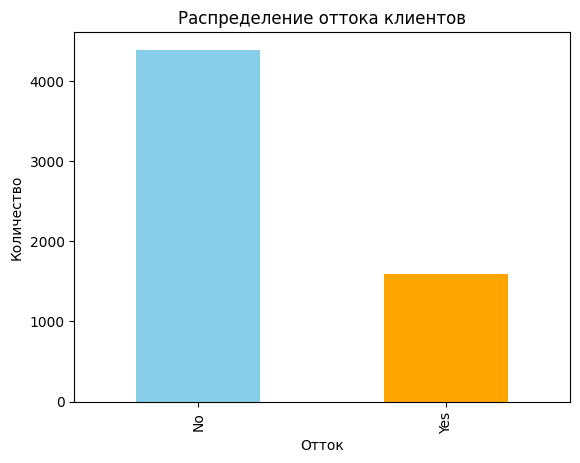

In [32]:

# Визуализация распределения целевых классов
data_df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Распределение оттока клиентов")
plt.xlabel("Отток")
plt.ylabel("Количество")
plt.show()

**Анализ категориальных и бинарных признаков**

In [33]:
# Определение списка категориальных признаков, за исключением целевого признака
columns = data_df.columns[data_df.dtypes == object][:-1].to_list()

# Определение словаря новых значений
new_values = {'No phone service': 'NoPS', 'No internet service': 'NoIS', 'Fiber optic': 'FO', 'Month-to-month': 'Month', 'One year': '1Y',
              'Two year': '2Y', 'Electronic check': 'ECheck', 'Mailed check': 'Mail', 'Bank transfer (automatic)': 'Bank', 'Credit card (automatic)': 'Card'}

# Замена длинных названий на короткие
for column in columns:
    data_df[column] = data_df[column].apply(lambda x: new_values[x] if x in new_values else x)

In [51]:
# Основные статистические показатели для строковых данных
data_df.describe(include=np.object_)

,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,FO,No,No,No,No,No,No,Month,Yes,ECheck,No
freq,3044,3080,4195,5388,2843,2627,2982,2604,2639,2959,2388,2353,3269,3525,2006,4389


Построим связь категориальных и бинарных признаков с оттоком клиентов.

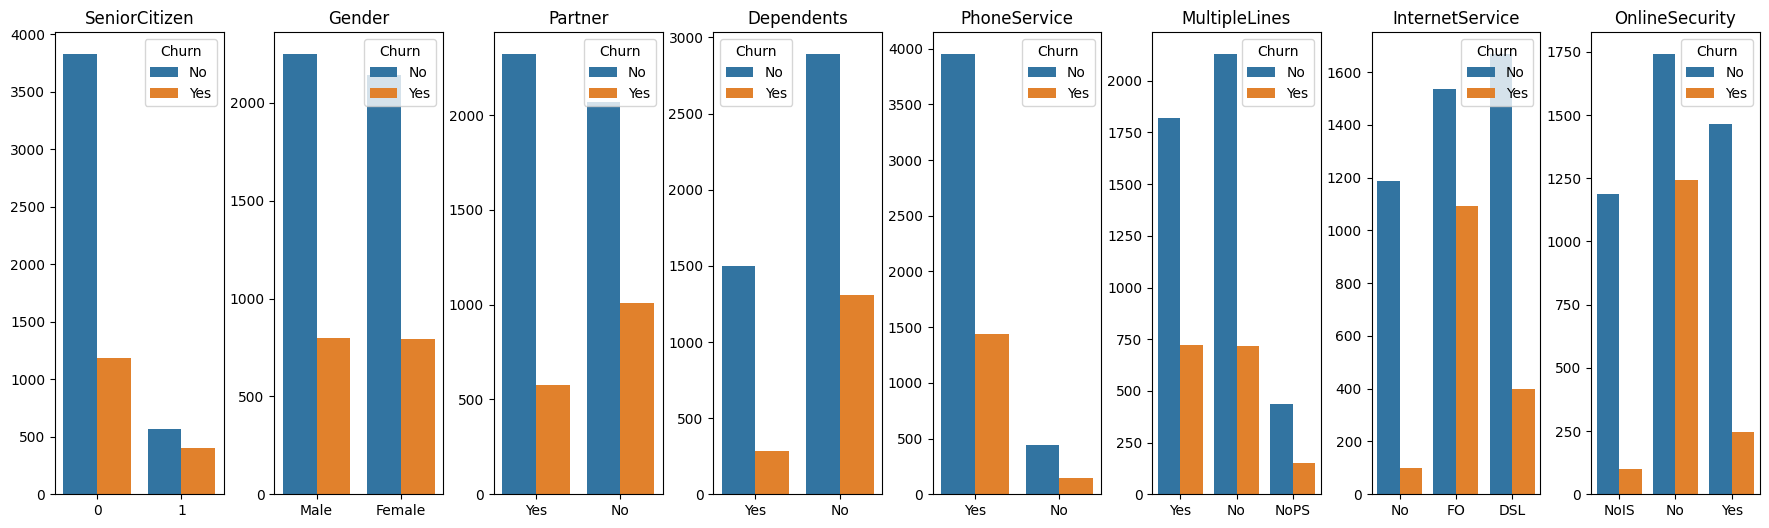

In [103]:
#  Создание основных объектов диаграммы

tips = data_df
cols = ["SeniorCitizen",
        'Gender',
        'Partner',
'Dependents' 	,
'PhoneService',
'MultipleLines',
'InternetService',
'OnlineSecurity'

]

f, axs = plt.subplots(1,len(cols), figsize=(22, 6),gridspec_kw={'wspace': 0.3})
for ax, col in zip(axs, cols):
    sns.countplot(data=tips, x=col, hue="Churn", ax=ax).set_title(col)


# Оформление диаграммы
plt.setp(axs, xlabel=None, ylabel=None)

# Вывод диаграммы
plt.show()


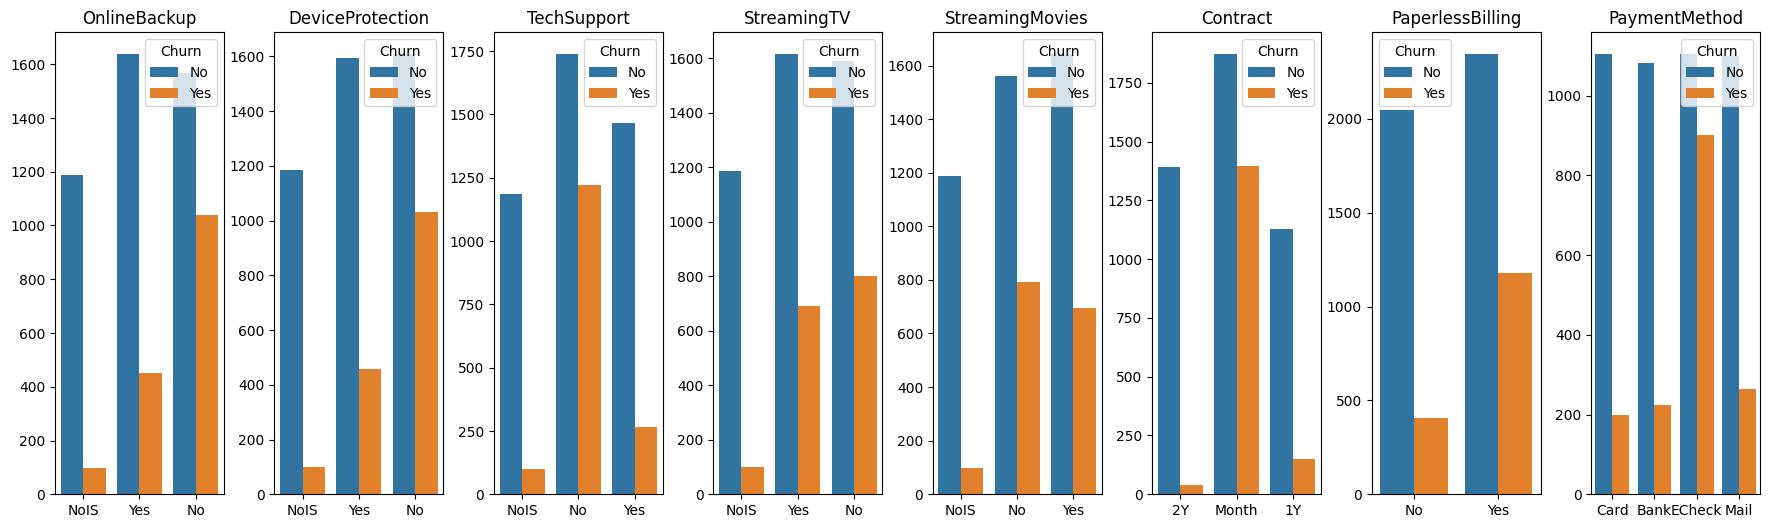

In [104]:
cols_2 = ['OnlineBackup' 	,
'DeviceProtection' 	,'TechSupport' 	,
'StreamingTV' 	,
'StreamingMovies' 	,
'Contract' 	,
'PaperlessBilling' 	,
'PaymentMethod'

]
f, axs = plt.subplots(1,len(cols_2), figsize=(22, 6),gridspec_kw={'wspace': 0.3})

for ax, col in zip(axs, cols_2):
    sns.countplot(data=tips, x=col, hue="Churn", ax=ax).set_title(col)



# Оформление диаграммы
plt.setp(axs, xlabel=None, ylabel=None)

# Вывод диаграммы
plt.show()

Из диаграмм видно, что все признаки, за исключением Gender, PhoneService, MultipleLines, StreamingTV и StreamingMovies имеют линейную связь с оттоком клиентов. В дальнейшем определим степень линейной связи признаков с целевым показателем и их важность для прогнозирования оттока клиентов.

**Анализ количественных признаков**

Построим распределение вероятности для количественных признаков и рассмотрим аномальные значения, которые возможно будут присутствовать в распределении. В случае выбросов, исключим данные значения из рассмотрения. Для усечения данных будем использовать правило 3-х сигм.

<ipython-input-105-6e4569a3e4eb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df.query('Churn=="No"')[column], label='No', ax=ax).set_title(column)
<ipython-input-105-6e4569a3e4eb>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df.query('Churn=="Yes"')[column], label='Yes', ax=ax

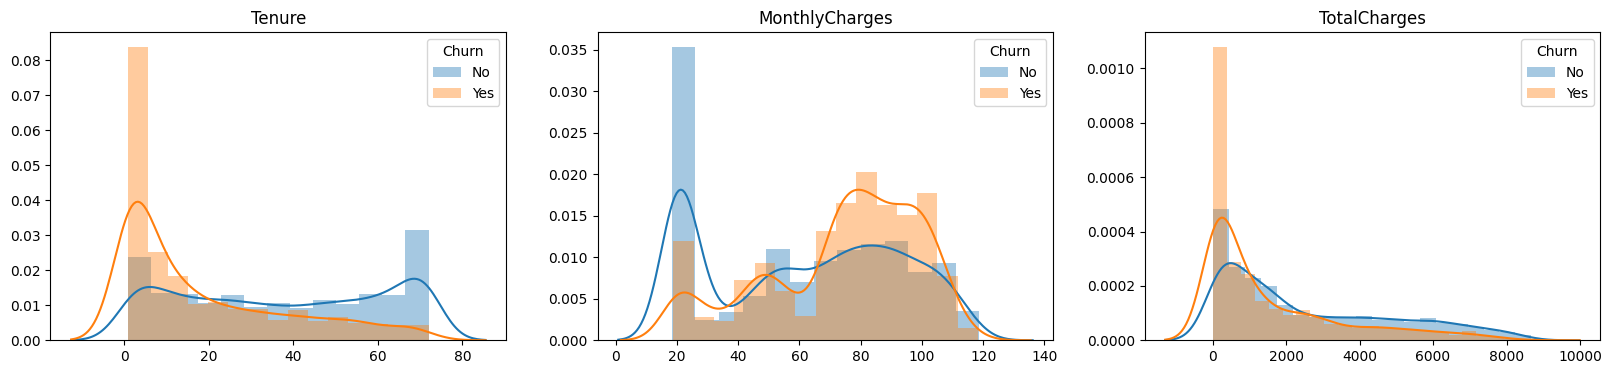

In [105]:
# Создание основных объектов диаграммы
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

# Построение диаграмм распределения случайных величин
for column, ax in zip(['Tenure', 'MonthlyCharges', 'TotalCharges'], axes.flat):
    sns.distplot(data_df.query('Churn=="No"')[column], label='No', ax=ax).set_title(column)
    sns.distplot(data_df.query('Churn=="Yes"')[column], label='Yes', ax=ax).set_title(column)
    ax.legend(loc='upper right', title='Churn')

# Оформление диаграммы
plt.setp(axes, xlabel=None, ylabel=None)

# Вывод диаграмм
plt.show()

Из полученных диаграмм видно, что признаки Tenure, MonthlyCharges, TotalCharges имеют характер распределения близкий к нормальному, а именно:

    признаки Tenure и TotalCharges представлены усеченной формой распределения, с резким снижением частот;
    признак MonthlyCharges представлен бимодальной гистограммой, что возможно свидетельствует о смешении двух различных категорий клиентов.

Кроме того, в признаке Tenure прослеживается четкая зависимость между увеличением количества месяцев, на протяжении которых человек является клиентом, и уменьшением оттока клиентов. Также присутствует обратная связь между размером ежемесячного платежа и оттоком.

Дополнительно можно отметить, что аномальные значения вероятностей, которые могли бы искажать распределения, отсутствуют.

**Поиск зависимостей**

Используя матрицу рассеивания отразим парное отношение признаков и их распределение.

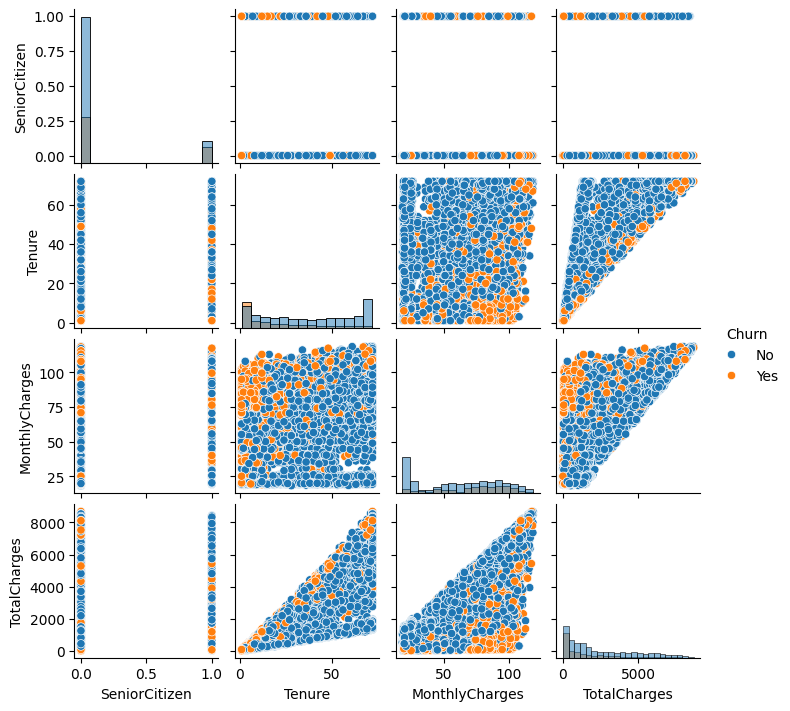

In [106]:
# Вывод пар признаков в матричном виде
sns.pairplot(data_df, hue='Churn', diag_kind='hist', height=1.8)

# Вывод диаграммы
plt.show()

Матрица рассеивания показывает, что имеющиеся численные признаки плохо классифицируются по оттоку клиентов. Тем не менее, признаки TotalCharges, Tenure и MonthlyCharges имеют достаточно высокий характер силы связи.

Также можно обратить внимание, что полученная матрица рассеивания не отражает всех признаков и полной картины линейных взаимосвязей, поэтому имеет смысл ввести дополнительные признаки посредством применения бинарного кодирования (one-hot encoding) к категориальным значениям.

Далее рассмотрим добавление новых признаков и выберем из них самые релевантные.

In [107]:
# Конструирование новых признаков
features_df = pd.get_dummies(data_df, columns=data_df.columns[data_df.dtypes==object], drop_first=True)

# Вывод новых признаков
features_df.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_NoPS,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_NoIS,StreamingMovies_Yes,Contract_2Y,Contract_Month,PaperlessBilling_Yes,PaymentMethod_Card,PaymentMethod_ECheck,PaymentMethod_Mail,Churn_Yes
1869,0,72,24.10,1734.65,True,True,True,True,False,True,...,False,True,False,True,False,False,True,False,False,False
4528,0,44,88.15,3973.20,False,False,False,True,False,False,...,True,False,False,False,True,True,True,False,False,False
6344,1,38,74.95,2869.85,False,True,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
6739,0,4,55.90,238.50,True,False,False,True,False,False,...,False,False,True,False,True,True,False,True,False,False
432,0,2,53.45,119.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False


Выведем матрицу корреляции с линейными коэффициентами Пирсона и проведем оценку степени линейной зависимости между признаками.

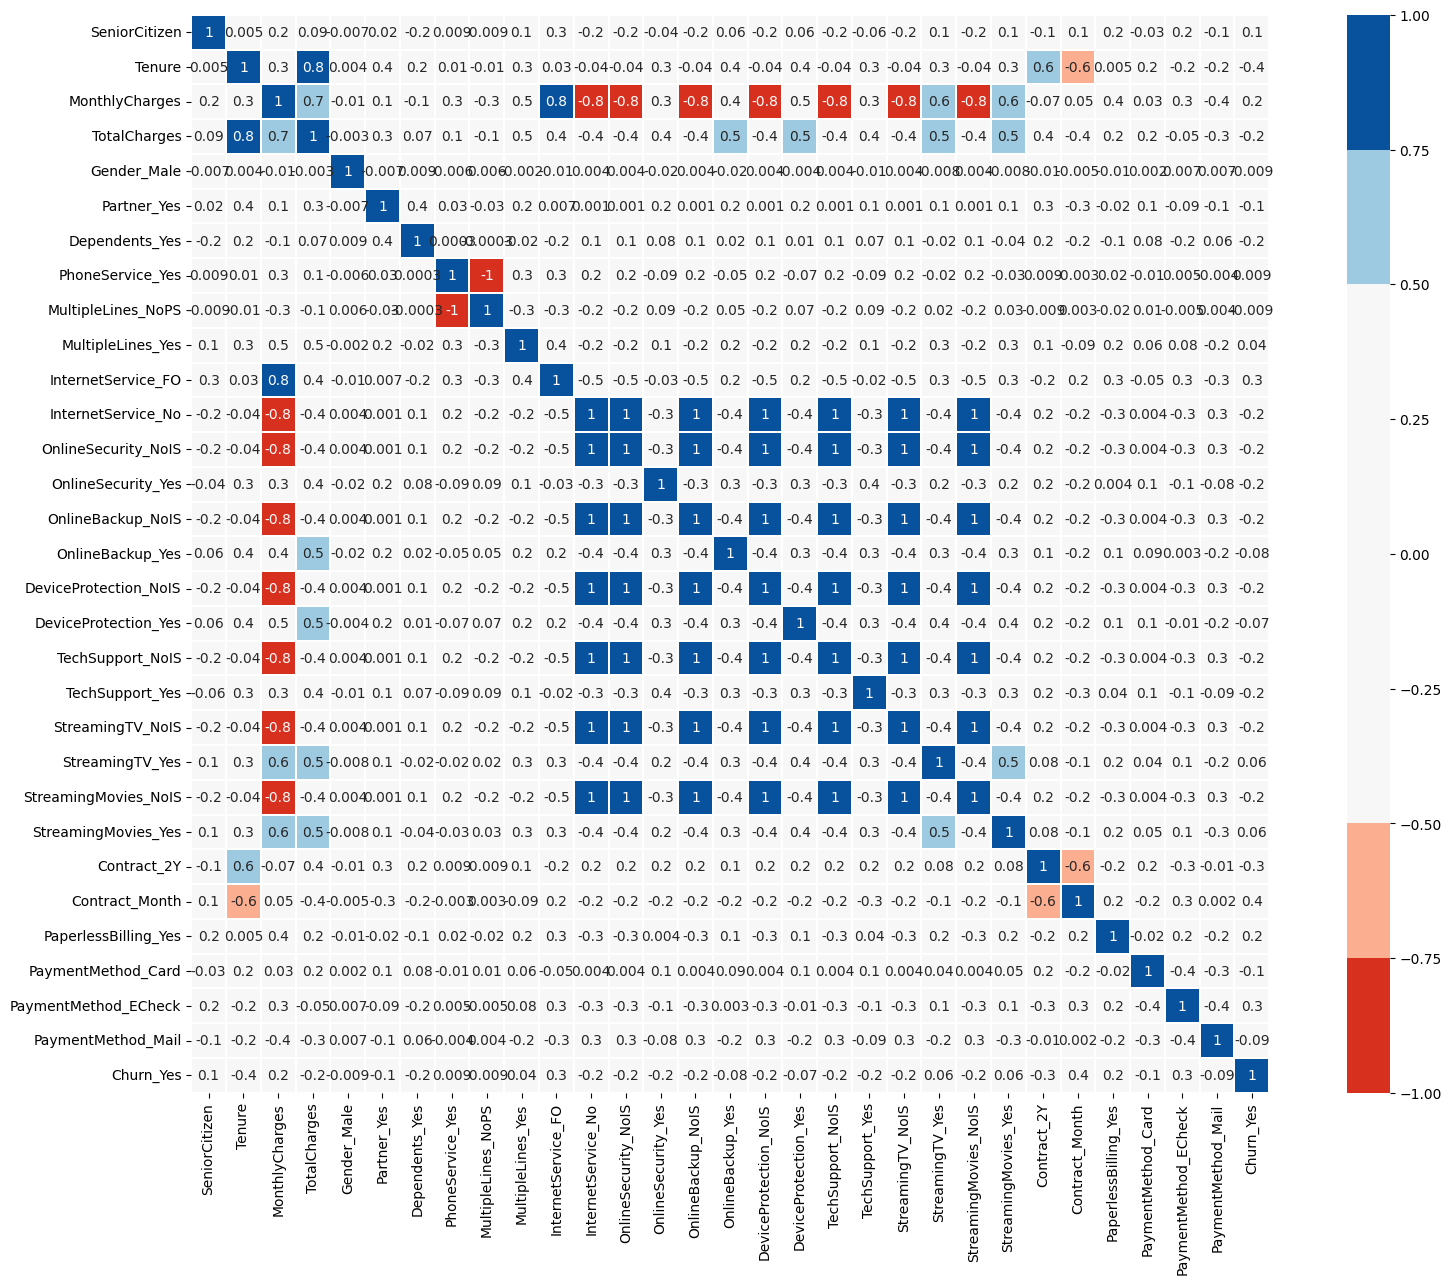

In [108]:
# Создание новой цветовой карты для подсвечивания сильных связей
color_map = sns.color_palette(['#d7301f', '#fcae91', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#9ecae1', '#08519c'])

# Определение размера диаграммы
plt.figure(figsize=(20, 14))

# Вывод корреляционной матрицы
ax = sns.heatmap(
    features_df.corr(), cmap=color_map, square=True, vmin=-1, vmax=1, center= 0,
    linewidths=0.1, linecolor='white', annot=True, fmt='.1g',
    cbar_kws=dict(ticks=np.arange(-1.0, 1.1, 0.25), aspect=25))

# Вывод диаграммы
plt.show()

В соответствии с полученной матрицей корреляции можно сказать, что в результате применения бинарного кодирования к категориальным значениям, полученный набор признаков избыточен. То есть 6-ть идентичных признаков: OnlineSecurity_NoIS, OnlineBackup_NoIS, DeviceProtection_NoIS, TechSupport_NoIS, StreamingTV_NoIS, StreamingMovies_NoIS можно удалить. Они полностью дублируют информацию, отраженную в признаке InternetService_No. Также наличие признака MultipleLines_NoPS является лишним, поскольку признаки MultipleLines_NoPS и PhoneService_Yes взаимоисключающие.

На матрице корреляции есть как положительные, так и отрицательные сильные связи между признаками, но с целевым признаком линейные связи очень слабые. Тем не менее, при наличии слабых корреляций между признаками и целевой переменной сохраняется возможность прогноза оттока клиентов.

В заключение можно сказать, что, как и ранее предполагали в анализе категориальных признаков, влияние признаков Gender, PhoneService, MultipleLines, StreamingTV и StreamingMovies на отток клиентов минимально. В последующем рассмотрим возможность исключения слабых признаков из анализа.

In [109]:
# Удаление признаков идентичных признаку "InternetService_No"
result_df = features_df.drop(columns=['OnlineSecurity_NoIS', 'OnlineBackup_NoIS', 'DeviceProtection_NoIS', 'TechSupport_NoIS', 'StreamingTV_NoIS', 'StreamingMovies_NoIS'])

# Удаление признака идентичного признаку "PhoneService_Yes"
result_df.drop(columns=['MultipleLines_NoPS'], inplace=True)

**Вывод**

В результате проведенного анализа были определены какие признаки больше всего могут оказывать влияние на отток клиентов, которые в последующем будут использованы для прогнозирования целевой переменной.

Также сформулируем ряд предположений, которые проверим в ходе работы:

    Между выявленными признаками и оттоком клиентов существует линейная зависимость, которая позволит прогнозировать поведение клиентов с достаточной точностью;
    Подтвердим гипотезу об отсутствии влияния признаков Gender_Male, PhoneService_Yes, StreamingTV_Yes и StreamingMovies_Yes на отток;
    Модель с лучшим определением групп высокого риска оттока предпочтительнее, чем модель с большим охватом.


###Построение моделей для прогнозирования оттока

Исходные данные
Разобьем исходные данные на тренировочную и контрольную выборки.

In [110]:
# Определение тренировочной и контрольной выборок
X_train, X_test, y_train, y_test = train_test_split(
    result_df.iloc[:, :-1].values, result_df.iloc[:, -1].values, random_state=17)

Нормализация данных
Поскольку не все алгоритмы машинного обучения могут хорошо работать с данными из разного диапазона, выполним масштабирование количественных признаков в диапазоне от 0 до 1.

In [111]:
# Нормализация значений признаков
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

**Отбор признаков**

Используем отбор признаков чтоб исключить часть переменных, которые возможно будут вносит незначительный вклад в будущую модель. Применим технику RFE (Recursive Feature Elimination) и выберем 10 значимых признаков для прогнозирования оттока клиентов.

In [117]:
# # Определение значимых признаков для прогноза целевой переменной
# rfe_model = RFE(RandomForestClassifier(max_depth=3), 10).fit(X_train, y_train)

# # Вывод признаков
# print(result_df.iloc[:, :-1].columns[rfe_model.support_].tolist())



model = RandomForestClassifier(n_estimators=10)
rfe = RFE(model, n_features_to_select=10)
X_selected = rfe.fit_transform(X_train, y_train)
selected_features = rfe.get_support()


[False  True  True  True  True  True False False False  True False False
 False False  True False False False  True  True False  True False]


In [118]:
model.fit(X_selected, y_train)

RandomForestClassifier(n_estimators=10)

In [120]:
# Вывод признаков
print(result_df.iloc[:, :-1].columns[rfe.support_].tolist())

['Tenure', 'MonthlyCharges', 'TotalCharges', 'Gender_Male', 'Partner_Yes', 'InternetService_FO', 'TechSupport_Yes', 'Contract_Month', 'PaperlessBilling_Yes', 'PaymentMethod_ECheck']


In [121]:
# Удаление слабых признаков из анализа
X_train = X_train[:, rfe.support_]
X_test = X_test[:, rfe.support_]

**Модели машинного обучения**

Рассмотрим ряд базовых алгоритмов классификации с целью определения лучшего алгоритма для прогноза оттока клиентов. В качестве метрики оценки алгоритма выберем показатель площади под кривой ошибок (ROC_AUC), что позволит в целом оценить качество классификации алгоритма. После определения лучшего алгоритма классификации проведем гиперпараметрическую настройку для оптимизации модели и оценим работу финальной модели на тестовой выборке данных.

In [122]:
# Определение базовых алгоритмов машинного обучения
models = [KNeighborsClassifier(),
          GaussianNB(),
          SVC(random_state=17),
          RandomForestClassifier(n_jobs=-1, random_state=17),
          XGBClassifier(n_jobs=-1, random_state=17)]

# Список метрик качества алгоритмов
scores = []

# Поиск подходящего базового алгоритма машинного обучения
for n, model in enumerate(models):
    scores.append(cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=10, n_jobs=-1).mean())

# Список наименований базовых алгоритмов
names = ['Метод К-ближайших соседей', 'Байесовский классификатор',
         'Метод опорных векторов', 'Случайный лес', 'Градиентный бустинг']

# Вывод метрик качества базовых алгоритмов
pd.DataFrame({'AUC': scores}, index=names)

,AUC
Метод К-ближайших соседей,0.785360
Байесовский классификатор,0.822214
Метод опорных векторов,0.780061
Случайный лес,0.814198
Градиентный бустинг,0.809446


Из полученных результатов видно, что лучший результат показал Наивный байесовский классификатор с показателем AUC=0.82. Поскольку Байесовский алгоритм не обладает гиперпараметрами для более точной настройки модели машинного обучения, дополнительно рассмотрим Градиентный бустинг с показателем AUC=0.80.

Выбрав алгоритм классификации перейдем к его оптимизации под задачу прогнозирования оттока клиентов. Настройку гиперпараметров модели реализуем через сеточный поиск с оценкой по метрике AUC.

In [123]:
# Гиперпараметры модели машинного обучения
params = {'n_estimators': [40],
          'max_depth': [2],
          'learning_rate': [0.2]}
# params = {'n_estimators': np.arange(10, 100, 10),
#           'max_depth': np.arange(2, 10, 2),
#           'learning_rate': np.arange(0.1, 0.3, 0.1)}

# Определение алгоритма модели машинного обучения
model = XGBClassifier(n_jobs=-1, random_state=17)

# Поиск оптимальных параметров модели машинного обучения
xgb_model = GridSearchCV(model, params, scoring='roc_auc', cv=10, n_jobs=-1).fit(X_train, y_train)

# Вывод метрики качества модели
pd.DataFrame({'AUC': xgb_model.best_score_}, index=['Градиентный бустинг'])

,AUC
Градиентный бустинг,0.844039


В соответствии с полученной метрикой качества модели машинного обучения можно сказать, что настроенный Градиентный бустинг (AUC=0.84) незначительно, но эффективнее чем Наивный байесовский классификатор (AUC=0.82).

Далее рассчитаем эффективность модели на Стекинге и сравним с метрикой качества Градиентного бустинга.

In [124]:
# Гиперпараметры мета-модели
params = {'n_estimators': [40],
          'learning_rate': [0.3],
          'min_child_weight': [5],
          'subsample': [0.1]}
# params = {'n_estimators': np.arange(10, 100, 10),
#           'learning_rate': np.arange(0.1, 1.0, 0.2),
#           'min_child_weight': np.arange(1, 10, 2),
#           'subsample': np.arange(0.1, 1.0, 0.2)}

# Определение базовых алгоритмов мета-модели
meta_alg = [KNeighborsClassifier(),
            GaussianNB(),
            SVC(random_state=17),
            RandomForestClassifier(n_jobs=-1, random_state=17)]

# Определение алгоритма мета-модели
model = XGBClassifier(n_jobs=-1, random_state=17)

# Получение матрицы мета-признаков на основе тренировочных данных
meta_mtrx = np.empty((X_train.shape[0], len(meta_alg)))
for n, alg in enumerate(meta_alg):
    meta_mtrx[:, n] = cross_val_predict(alg, X_train, y_train, cv=10, n_jobs=-1)

# Получение матрицы мета-признаков на основе тестовых данных
meta_mtrx_test = np.empty((X_test.shape[0], len(meta_alg)))
for n, alg in enumerate(meta_alg):
    meta_mtrx_test[:, n] = alg.fit(X_train, y_train).predict(X_test)

# Поиск оптимальных параметров мета-модели
meta_model = GridSearchCV(model, params, cv=10, scoring='roc_auc', n_jobs=-1).fit(meta_mtrx, y_train)

# Вывод метрики качества модели
pd.DataFrame({'AUC': meta_model.best_score_}, index=['Стекинг'])

,AUC
Стекинг,0.785091


Полученный результат метрики качества Стекинга (AUC=0.78) оказался хуже метрики Градиентного бустинга (AUC=0.84). В последующем оценим эффективность всех вышеотмеченных моделей (Байесовский классификатор, Градиентный бустинг, Стекинг) по метрике "полнота" (Recall), поскольку нас интересует минимизация ложноотрицательных прогнозов, выдаваемых моделями.
Вывод

В ходе построения моделей прогнозирования оттока клиентов были определены 3 модели, показавшие неплохую метрику качества ROC_AUC:

    Байесовский классификатор - 0.82;
    Градиентный бустинг - 0.84;
    Стекинг - 0.78.

Учитывая, что основной задачей является прогноз ухода клиентов, в последующем выполним расчет и сравнение оценок моделей по метрике "полнота" (Recall). Данная метрика позволит свести к минимуму ложноотрицательные прогнозы и не упустить клиентов, которые на самом деле могут уйти.

Поскольку в области принятия решений предпочтительнее опираться на вероятность, также определим значения вероятностей оттока клиентов. Предсказание вероятности ухода позволит понять к какому из клиентов следует обратиться в первую очередь, а к кому в последнюю.

###Сравнение качества моделей


Метрики качества моделей

In [125]:
# Определение модели машинного обучения
gnb_model = GaussianNB().fit(X_train, y_train)

# Расчет прогноза моделей
gnb_predict = gnb_model.predict(X_test)
xgb_predict = xgb_model.best_estimator_.predict(X_test)
meta_predict = meta_model.best_estimator_.predict(meta_mtrx_test)

# Вывод метрик качества моделей
pd.DataFrame({'AUC': [roc_auc_score(y_test, gnb_predict), roc_auc_score(y_test, xgb_predict), roc_auc_score(y_test, meta_predict)],
              'Recall': [recall_score(y_test, gnb_predict), recall_score(y_test, xgb_predict), recall_score(y_test, meta_predict)],
              'Precision': [precision_score(y_test, gnb_predict), precision_score(y_test, xgb_predict), precision_score(y_test, meta_predict)]},
             index=['Байесовский классификатор', 'Градиентный бустинг', 'Стекинг'])

,AUC,Recall,Precision
Байесовский классификатор,0.736263,0.687657,0.536346
Градиентный бустинг,0.700385,0.503778,0.638978
Стекинг,0.691785,0.481108,0.640940


Матрицы ошибок

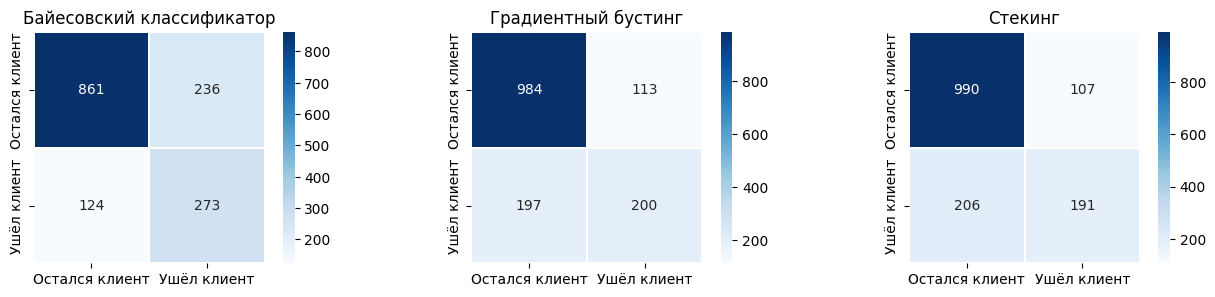

In [126]:
# Определение размера диаграмм
fig, axes = plt.subplots(1, 3, figsize=(16, 3))

# Список целевых переменных предсказанных моделями
y_predicts = [gnb_predict, xgb_predict, meta_predict]

# Список наименований моделей
name_models = ['Байесовский классификатор', 'Градиентный бустинг', 'Стекинг']

# Вывод матриц ошибок
for ax, y_predict, name in zip(axes.flat, y_predicts, name_models):
    sns.heatmap(
        confusion_matrix(y_test, y_predict), cmap='Blues', square=True,
        linewidths=0.1, linecolor='white', annot=True, fmt='d',
        xticklabels=['Остался клиент', 'Ушёл клиент'],
        yticklabels=['Остался клиент', 'Ушёл клиент'],
        ax=ax
    ).set_title(name)

# Вывод диаграмм
plt.show()

Из результатов сравнения моделей видно, что Наивный байесовский классификатор превосходит остальные алгоритмы по показателю полноты (Recall). При 397 фактических случаев ухода клиентов, 311 оказались правильными. По показателю точности (Precision) на первом месте Градиентный бустинг. При 332 спрогнозированных случаях оттока, 210 правильные.

Хотя по показателю полноты Наивный байесовский классификатор превосходит Градиентный бустинг и Стекинг, по точности им уступает. Если не затрагивать вопрос интерпретируемости полученных результатов, выбор очевиден - Байесовский классификатор, поскольку производит лучший охват в прогнозе оттока клиентов.

Далее рассмотрим, как интерпретируются полученные результаты выбранных моделей: Наивного байесовского классификатора, Градиентного бустинга и Стекинга. Также определим лучшую модель для выявления клиентов, которые не собираются продлевать контракт.
Вероятность оттока
Определим функцию сравнения прогнозных вероятностей оттока клиентов, полученных с помощью модели машинного обучения, с фактическими исходами.

In [127]:
def predict_probabilities(model, X, y):
    # Определение вероятности исхода для всех клиентов
    predict_proba = model.predict_proba(X)

    # Выборка вероятностей для ушедших клиентов с
    # округлением значений для укрупненного подсчета
    predict_churn = np.round(predict_proba[:, 1], 1)

    # Подсчет количества вероятностей ушедших клиентов
    value_churn = pd.value_counts(predict_churn)

    # Выборка истинных исходов ушедших клиентов
    true_churn = y==1

    # Определение доли истинных исходов ушедших клиентов
    # или реальная вероятность ухода клиента
    true_proba = [np.mean(true_churn[predict_churn==value]) for value in value_churn.index]

    # Объединение вероятностей в датафрейм
    result_df = pd.concat([value_churn.reset_index(), pd.Series(true_proba)], axis=1)

    # Указание названий столбцов и сортировка значений в датафрейме
    result_df.columns = ['Прогнозная вероятность', 'Кол. ушедших', 'Истинная вероятность']
    result_df = result_df.sort_values('Прогнозная вероятность', ascending=False).reset_index(drop=True)

    # Возвращение датафрейма
    return result_df

**Байесовский классификатор**

In [131]:
# Вывод вероятностей ухода клиентов
predict_probabilities(gnb_model, X_test, y_test)

<ipython-input-127-38b5579f750f>:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  value_churn = pd.value_counts(predict_churn)


,Прогнозная вероятность,Кол. ушедших,Истинная вероятность
0,1.0,192,0.656250
1,0.9,126,0.595238
2,0.8,61,0.426230
3,0.7,59,0.423729
4,0.6,47,0.297872
5,0.5,64,0.218750
6,0.4,48,0.291667
7,0.3,63,0.253968
8,0.2,94,0.212766
9,0.1,80,0.200000


**Градиентный бустинг**

In [129]:
# Вывод вероятностей ухода клиентов
predict_probabilities(xgb_model, X_test, y_test)

<ipython-input-127-38b5579f750f>:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  value_churn = pd.value_counts(predict_churn)


,Прогнозная вероятность,Кол. ушедших,Истинная вероятность
0,0.9,14,1.000000
1,0.8,43,0.744186
2,0.7,65,0.723077
3,0.6,122,0.590164
4,0.5,127,0.425197
5,0.4,122,0.459016
6,0.3,169,0.301775
7,0.2,174,0.160920
8,0.1,294,0.119048
9,0.0,364,0.021978


**Стекинг**

In [130]:
# Вывод вероятностей ухода клиентов
predict_probabilities(meta_model, meta_mtrx_test, y_test)

<ipython-input-127-38b5579f750f>:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  value_churn = pd.value_counts(predict_churn)


,Прогнозная вероятность,Кол. ушедших,Истинная вероятность
0,0.7,182,0.714286
1,0.6,63,0.571429
2,0.5,53,0.471698
3,0.4,166,0.337349
4,0.3,66,0.515152
5,0.2,32,0.250000
6,0.1,932,0.115880


Из полученных результатов прогноза оттока клиентов можно сказать, что Градиентный бустинг показывает более близкую вероятность ухода клиента к фактическому исходу, чем Наивный байесовский классификатор и Стекинг. Для 65 клиентов Градиентный бустинг предсказал вероятность ухода равную 0.7 и в реальности эта группа имеет примерно равный показатель - 0.72. Байесовский классификатор предсказал, что 192 клиентов имеют вероятность ухода, равную 1.00, в реальности эта группа имеет показатель 0.65.

Поскольку вероятность оттока клиентов позволяет оценить не только степень уверенности потери клиента, но и понять с какой группой клиентов следует работать в первую очередь, допускаю, что из трех выбранных моделей для Компании выгоднее смотрится Градиентный бустинг.
Вывод

**Подводя итоги по проекту можно сделать следующие выводы:**

- Раннее выдвинутое предположение о высокой степени связи признаков Tenure, MonthlyCharges, TotalCharges с целевой переменной подтвердилось. Так как данные признаки были определены как значимые и вошли в модель прогноза оттока (разделы "Поиск зависимостей" и "Отбор признаков");

- Также подтвердилась гипотеза об отсутствии влияния признаков Gender_Male, PhoneService_Yes, StreamingTV_Yes, StreamingMovies_Yes на отток клиентов;

- Предсказывая отток, Компании важно не упустить клиентов, которые на самом деле уйдут, то есть свести к минимуму ложноотрицательные прогнозы моделей и ориентироваться на метрику полноты (Recall). Наивный байесовский классификатор превзошел остальные модели с показателем 0.68. По показателю полноты данную модель будем считать лучшей;
- Нас интересует как полнота прогнозирования, так и интерпретируемость модели. Разделяя клиентов по степени уверенности потери, на основе показателя точности (Precision), можем выявить первоочередные группы (группы высокого риска). Точное и своевременное нахождение таких групп позволит эффективно бороться с оттоком. Учитывая немаловажность показателя точности в области принятия решений, допускаю, что модель с лучшим определением групп высокого риска предпочтительнее для Компании, чем модель с большим охватом оттока. Поэтому модель Градиентного бустинга для бизнеса подходит больше, чем модель Байесовского классификатора;
- В проекте не были затронуты темы профилирования и сегментации клиентов, что не позволит Компании адресно и точно взаимодействовать с клиентами, особенно с клиентами склонных к оттоку и в целом снизит эффективность управления оттоком;
- Также можно отметить, что количество предоставленных данных (клиентов) недостаточно для построения точной модели и важно продолжать расширять клиентскую базу.
